In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
df_qt = pd.read_json("./ql_toy1_v2_comp_gen.json")
df_qt_2 =pd.read_json("./scenario2_v2_comp_gen.json")
df_dqn = pd.read_json("./dqn_toy1_comp_gen_comp_gen.json")

gData = lambda df, cat: {
    'Q-Table': df['Q'][cat],
    #'DQN': df_dqn['DQN'][cat],
    'Heuristic': df['heuristic'][cat],
    'Random': df['random'][cat],
    'No Action': df['no_action'][cat],
}

qData = lambda df,df_dqn, cat: {
    'Q-Table': df['Q'][cat],
    'DQN': df_dqn['DQN'][cat],
    'Heuristic': df['heuristic'][cat],
    'Random': df['random'][cat],
    'No Action': df['no_action'][cat],
}


In [75]:
len(df_dqn['DQN']["completed"])

100

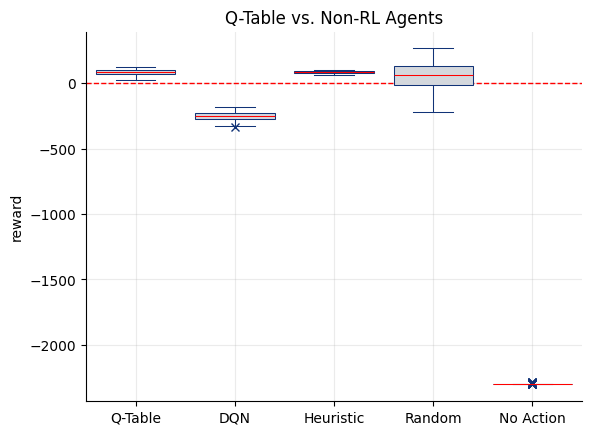

In [76]:

# Plotting multiple boxplots on the same axis
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
sns.boxplot(data=pd.DataFrame(qData(df_qt, df_dqn,"rewards")),color="#D3D8DE", linecolor="#137", linewidth=.75, flierprops={"marker": "x"},medianprops={"color": "r"},)
sns.despine()
plt.title("Q-Table vs. Non-RL Agents")
plt.ylabel("reward")
plt.grid(alpha=.25)
plt.show()

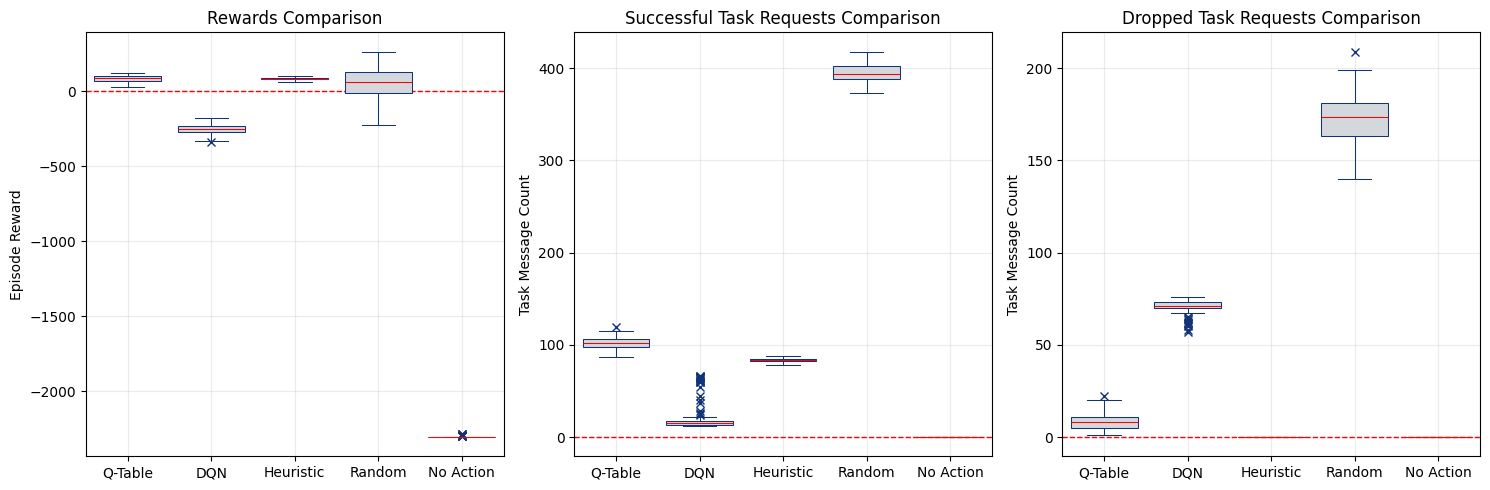

In [77]:

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Plot each boxplot on a different subplot

axes[0].axhline(y=0, color='r', linestyle='--', linewidth=1)
sns.boxplot(data=pd.DataFrame(qData(df_qt,df_dqn,"rewards")),color="#D3D8DE", linecolor="#137", linewidth=.75, flierprops={"marker": "x"},medianprops={"color": "r"}, ax=axes[0])
axes[0].set_title('Rewards Comparison')
axes[0].grid(alpha=.25)
axes[0].set_ylabel('Episode Reward')


axes[1].axhline(y=0, color='r', linestyle='--', linewidth=1)
sns.boxplot(data=pd.DataFrame(qData(df_qt,df_dqn,"completed")),color="#D3D8DE", linecolor="#137", linewidth=.75, flierprops={"marker": "x"},medianprops={"color": "r"}, ax=axes[1])
axes[1].set_title('Successful Task Requests Comparison')
axes[1].grid(alpha=.25)
axes[1].set_ylabel('Task Message Count')


axes[2].axhline(y=0, color='r', linestyle='--', linewidth=1)
sns.boxplot(data=pd.DataFrame(qData(df_qt,df_dqn,"dropped")),color="#D3D8DE", linecolor="#137", linewidth=.75, flierprops={"marker": "x"},medianprops={"color": "r"}, ax=axes[2])
axes[2].set_title('Dropped Task Requests Comparison')
axes[2].grid(alpha=.25)
axes[2].set_ylabel('Task Message Count')



# Remove the spines around each plot


# Adjust spacing between the subplots
plt.tight_layout()

# Show the plot
plt.show()

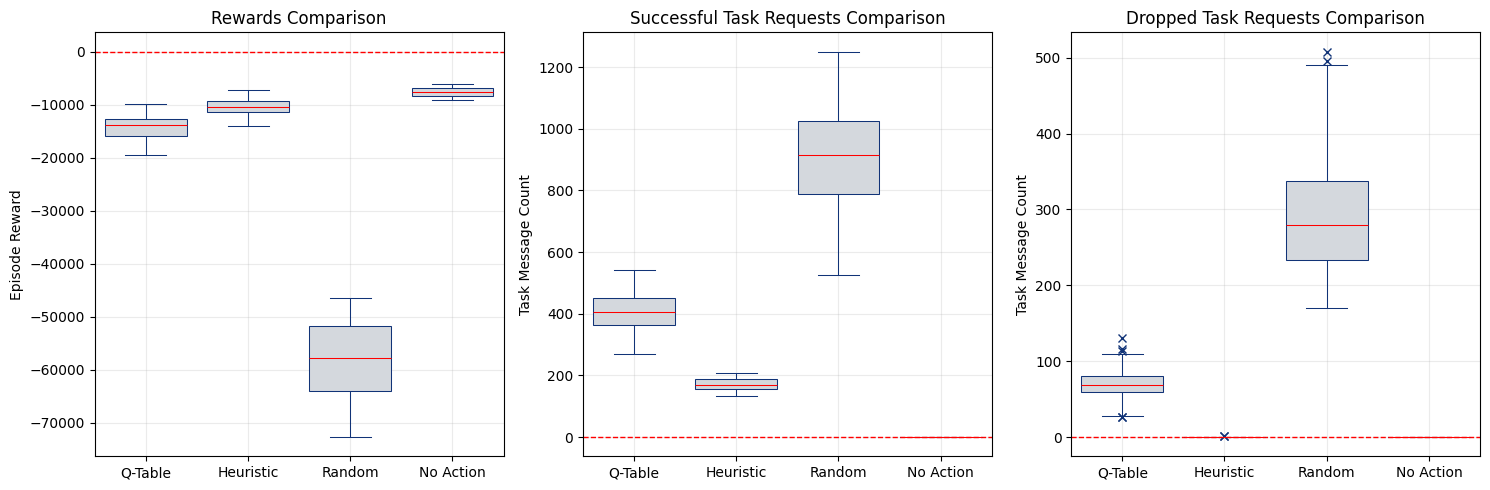

In [78]:

# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Plot each boxplot on a different subplot

axes[0].axhline(y=0, color='r', linestyle='--', linewidth=1)
sns.boxplot(data=pd.DataFrame(gData(df_qt_2,"rewards")),color="#D3D8DE", linecolor="#137", linewidth=.75, flierprops={"marker": "x"},medianprops={"color": "r"}, ax=axes[0])
axes[0].set_title('Rewards Comparison')
axes[0].grid(alpha=.25)
axes[0].set_ylabel('Episode Reward')


axes[1].axhline(y=0, color='r', linestyle='--', linewidth=1)
sns.boxplot(data=pd.DataFrame(gData(df_qt_2,"completed")),color="#D3D8DE", linecolor="#137", linewidth=.75, flierprops={"marker": "x"},medianprops={"color": "r"}, ax=axes[1])
axes[1].set_title('Successful Task Requests Comparison')
axes[1].grid(alpha=.25)
axes[1].set_ylabel('Task Message Count')


axes[2].axhline(y=0, color='r', linestyle='--', linewidth=1)
sns.boxplot(data=pd.DataFrame(gData(df_qt_2,"dropped")),color="#D3D8DE", linecolor="#137", linewidth=.75, flierprops={"marker": "x"},medianprops={"color": "r"}, ax=axes[2])
axes[2].set_title('Dropped Task Requests Comparison')
axes[2].grid(alpha=.25)
axes[2].set_ylabel('Task Message Count')



# Remove the spines around each plot


# Adjust spacing between the subplots
plt.tight_layout()

# Show the plot
plt.show()